# Grey-box identification of heat transfer dynamics

Last update: 27-07-2023

---

The primary goal of this project is to identify convection effects in a grey-box model of heat transfer dynamics (see system description below), based on temperature measurements throughout the rod.

In [2]:
import Pkg
Pkg.activate("..")
Pkg.instantiate()

  Activating project at `~/syndr/Wouter/Onderzoek/Projecten/sioux/sysid-thermal/CCTA2024-BIDconvection`


┌ Warning: The active manifest file has dependencies that were resolved with a different julia version (1.10.0). Unexpected behavior may occur.
└ @ nothing /home/wmkouw/syndr/Wouter/Onderzoek/Projecten/sioux/sysid-thermal/CCTA2024-BIDconvection/Manifest.toml:0


   Installed FiniteDifferences ───── v0.12.28


   Installed Sundials ────────────── v4.19.0


   Installed SteadyStateDiffEq ───── v1.15.0


   Installed Richardson ──────────── v1.4.0


   Installed BlockDiagonals ──────── v0.1.41


   Installed DiffEqNoiseProcess ──── v5.17.1


   Installed DifferentialEquations ─ v7.8.0


   Installed StochasticDiffEq ────── v6.61.0


   Installed JumpProcesses ───────── v9.6.3


   Installed MAT ─────────────────── v0.10.5


Precompiling 

project...


  ✓ Tricks


  ✓ ADTypes


  ✓ Richardson
  ✓ ExprTools


  ✓ Inflate


  ✓ BufferedStreams


  ✓ KLU
  ✓ SimpleTraits


  ✓ Distances
  ✓ TruncatedStacktraces


  ✓ HDF5_jll


  ✓ GPUArraysCore


  ✓ RuntimeGeneratedFunctions


  ✓ Tables


  ✓ ChainRulesCore


  ✓ ResettableStacks


  ✓ ArrayInterface → ArrayInterfaceGPUArraysCoreExt


  ✓ Sparspak


  ✓ Sundials_jll


  ✓ ArnoldiMethod


  ✓ ZygoteRules


  ✓ Lazy


  ✓ LogExpFunctions → LogExpFunctionsChainRulesCoreExt


  ✓ FiniteDifferences


  ✓ Polynomials → PolynomialsChainRulesCoreExt


  ✓ BlockDiagonals


  ✓ Krylov


  ✓ StatsBase


  ✓ SpecialFunctions


  ✓ LevyArea
  ✓ DiffRules


  ✓ GaussQuadrature


  ✓ DualNumbers


  ✓ Graphs


  ✓ SpecialFunctions → SpecialFunctionsChainRulesCoreExt


  ✓ VertexSafeGraphs


  ✓ HypergeometricFunctions


  ✓ FastGaussQuadrature
  ✓ ColorVectorSpace


  ✓ HDF5
  ✓ StatsFuns


  ✓ ForwardDiff


  ✓ DomainIntegrals


  ✓ MAT


  ✓ StatsFuns → StatsFunsChainRulesCoreExt


  ✓ ForwardDiff → ForwardDiffStaticArraysExt


  ✓ PreallocationTools


  ✓ Distributions


  ✓ ColorSchemes


  ✓ Distributions → DistributionsChainRulesCoreExt


  ✓ PlotUtils


  ✓ PlotThemes


  ✓ ExponentialUtilities


  ✓ RecipesPipeline


  ✓ BandedMatrices


  ✓ ArrayInterface → ArrayInterfaceBandedMatricesExt


  ✓ FiniteDiff


  ✓ RecursiveArrayTools


  ✓ StaticArrayInterface


  ✓ SciMLOperators


  ✓ NLSolversBase


  ✓ FiniteDiff → FiniteDiffStaticArraysExt


  ✓ StaticArrayInterface → StaticArrayInterfaceOffsetArraysExt


  ✓ CloseOpenIntervals


  ✓ LayoutPointers


  ✓ StaticArrayInterface → StaticArrayInterfaceStaticArraysExt


  ✓ FiniteDiff → FiniteDiffBandedMatricesExt


  ✓ StrideArraysCore
  ✓ LineSearches


  ✓ SparseDiffTools


  ✓ NLsolve


  ✓ Polyester


  ✓ FastBroadcast


  ✓ Optim


  ✓ SciMLBase


  ✓ DiffEqBase


  ✓ SciMLNLSolve


  ✓ DiffEqCallbacks


  ✓ DiffEqBase → DiffEqBaseDistributionsExt


  ✓ DiffEqBase → DiffEqBaseUnitfulExt


  ✓ DiffEqNoiseProcess


  ✓ JumpProcesses


  ✓ SteadyStateDiffEq


  ✓ VectorizationBase


  ✓ BoundaryValueDiffEq


  ✓ SLEEFPirates


  ✓ SimpleNonlinearSolve


  ✓ Sundials


  ✓ LoopVectorization


  ✓ LoopVectorization → SpecialFunctionsExt


  ✓ LoopVectorization → ForwardDiffExt


  ✓ TriangularSolve


  ✓ RecursiveFactorization


  ✓ ReactiveMP


  ✓ ReactiveMP → ReactiveMPRequiresExt


  ✓ Plots


  ✓ Plots → FileIOExt


  ✓ RxInfer


  ✓ Plots → UnitfulExt


  ✓ LinearSolve


  ✓ NonlinearSolve


  ✓ OrdinaryDiffEq


  ✓ DelayDiffEq


  ✓ StochasticDiffEq


  ✓ DifferentialEquations
  105 dependencies successfully precompiled in 661 seconds. 198 already precompiled.


In [3]:
Pkg.status()

Status `~/syndr/Wouter/Onderzoek/Projecten/sioux/sysid-thermal/CCTA2024-BIDconvection/Project.toml`
⌃ [0a1fb500] BlockDiagonals v0.1.41
⌃ [0c46a032] DifferentialEquations v7.8.0
⌃ [31c24e10] Distributions v0.25.95
⌃ [f6369f11] ForwardDiff v0.10.35
⌃ [033835bb] JLD2 v0.4.31
⌃ [b964fa9f] LaTeXStrings v1.3.0
⌃ [23992714] MAT v0.10.5
⌃ [429524aa] Optim v1.7.6
⌅ [91a5bcdd] Plots v1.38.15
⌃ [f27b6e38] Polynomials v3.2.13
⌃ [86711068] RxInfer v2.11.1
⌃ [276daf66] SpecialFunctions v2.2.0
⌅ [2913bbd2] StatsBase v0.33.21
  [3a884ed6] UnPack v1.0.2
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


## System description

A schematic depiction of the setup is shown in the figure below. 

<p><center><img src='../../system/system-photo.png'/></center></p>

In short, the setup consists of 3 metal blocks which have been lined up, with resistive nylon pads interposed. The temperature can be measured using thermistors at arbitrary places on the setup; for simplicity we assume that we measure the temperature at a single spot on each block, which we call $\tau_1$, $\tau_2$, and $\tau_3$. The temperatures will evolve due to a number of different factors; we will only consider the influence of conduction, convection, radiation, and the user controlled input heat (band heaters).

By assuming that conduction within blocks is so fast that there are no temperature differences within a block, we may model the system using a [lumped-element model](https://en.wikipedia.org/wiki/Lumped-element_model), governed by the following system of ODEs:

$$\frac{d}{dt}\begin{pmatrix} m_1 c_{p, 1} \tau_1 \\ m_2 c_{p, 2} \tau_2 \\ m_3 c_{p, 3} \tau_3 \end{pmatrix} = 
\underbrace{\begin{pmatrix} -k_{12} & k_{12} & 0 \\ k_{12} & -(k_{12} + k_{23}) & k_{23} \\ 0 & k_{23} & -k_{23} \end{pmatrix} \begin{pmatrix} \tau_1 \\ \tau_2 \\ \tau_3 \end{pmatrix}}_{\textrm{conduction}} + \underbrace{\begin{pmatrix} h(\tau_1, \tau_a, 1, t) \\ h(\tau_2, \tau_a, 2, t) \\ h(\tau_3, \tau_a, 3, t) \end{pmatrix}}_{\textrm{convection}} + \underbrace{\sigma \begin{pmatrix} a_1 \varepsilon_1 (\tau_a^4 - \tau_1^4) \\ a_2 \varepsilon_2 (\tau_a^4 - \tau_2^4) \\ a_3 \varepsilon_3 (\tau_a^4 - \tau_3^4) \end{pmatrix}}_{\textrm{radiation}} + \underbrace{\begin{pmatrix} u_1 \\ u_2 \\ u_3 \end{pmatrix}}_{\textrm{input}}.$$

Convection is notoriously hard to model. A coarse approximation would be Newton's law of cooling (Clercx, 2015; Eq. 8.17), which states that convection is linear in the difference between the temperature of the block and the ambient temperature: $h_a (\tau_a - \tau_i)$. With this linear term, we can take steps similar to the identification of the oscillator in Rogers \& Friis (2022), describing the nonlinear function as the combination of a linear term and a "nonlinear remainder":

$$\underbrace{h(\tau_i, \tau_a, i, t)}_{\text{total convection}} = \underbrace{h_a (\tau_a - \tau_i)}_{\text{linear cooling law}} + \underbrace{r(\tau_i, \tau_a, i, t)}_{\text{nonlinear remainder}} \, ,$$

for some constant $h_a$. Furthermore, the role of radiation can often be neglected. With these simplifications, our governing equations become:

$$\frac{d}{dt}\begin{pmatrix} m_1 c_{p, 1} \tau_1 \\ m_2 c_{p, 2} \tau_2 \\ m_3 c_{p, 3} \tau_3 \end{pmatrix} = 
\begin{pmatrix} -k_{12} & k_{12} & 0 \\ k_{12} & -(k_{12} + k_{23}) & k_{23} \\ 0 & k_{23} & -k_{23} \end{pmatrix} \begin{pmatrix} \tau_1 \\ \tau_2 \\ \tau_3 \end{pmatrix} + h_a \begin{pmatrix} a_1 (\tau_a - \tau_1) \\ a_2 (\tau_a - \tau_2) \\ a_3 (\tau_a - \tau_3) \end{pmatrix} + \begin{pmatrix} r(\tau_1, \tau_a, 1, t) \\ r(\tau_2, \tau_a, 2, t) \\ r(\tau_3, \tau_a, 3, t) \end{pmatrix} + \begin{pmatrix} u_1 \\ u_2 \\ u_3 \end{pmatrix},$$

or, more compactly, 

$$ M \dot{z} = K z + h_a a (\tau_a - z) + r(z,\tau_a) + u$$

where $z = [\tau_1 \, , \ \tau_2 \, , \ \tau_3]$.

In these equations, we can distinguish three types of quantities:
1. Measured/observed quantities: e.g. $\tau_i$, $u_i$. These may vary over time, and are known up to a given accuracy due to measurement noise;

2. Known constants: e.g. $m_i$, $c_{p, i}$, $a$, $\tau_a$. These are fully known, and are constant over time. This is reasonable for quantities such as mass $m$ and surface area $a$ (which can be easily measured) and specific heat capacity $c_p$ (which is a material property which according to the Dulong-Petit Law is roughly constant for metals over a long range of temperatures Carter (2000), Ch. 16) Maybe it is less reasonable for the ambient temperature $\tau_a$ (due to e.g. the setup heating up its surroundings);

3. Unknown constants: e.g. $k_{ij}$, $h_a$. These are not known a priori, because there is no simple physical way to measure or derive their values. For example, the conduction coefficients $k_{ij}$ can vary depending on how tightly the blocks have been put together. In this project, we want to identify these constants using Bayesian inference.

In [2]:
using Revise
using DifferentialEquations
using GaussianProcesses
using Distributions
using ForwardDiff
using LaTeXStrings
using LinearAlgebra
using JLD2
using Optim
using Polynomials
using Random
using RxInfer
using Plots; 
default(label="", linewidth=3, margin=15Plots.pt)

include("../util/discretization.jl");
include("../util/heat-input.jl");

## Data simulation

In [3]:
# Time parameters
T = 1000
Δt = 1.0
tsteps = range(1e-3, step=Δt, length=T)

# Constants
true_mcp_1 = 1e3
true_mcp_2 = 1e3
true_mcp_3 = 1e3
true_a_1 = 1.0
true_a_2 = 1.0
true_a_3 = 1.0
true_k12 = 10.
true_k23 = 10.
true_h_a = 2.0
true_τ_a = 21.
true_R   = 1e-3*diagm(ones(3))

# Input heat parameters
true_b = [100.0, 0., 0.]

3-element Vector{Float64}:
 100.0
   0.0
   0.0

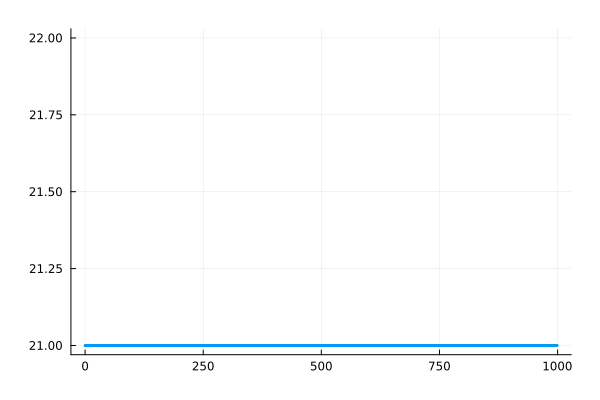

In [26]:
function T_a(t::Float64, t_on::Float64, t_off::Float64)
    return 21 - 5 ./(1+exp(-0.04*(t - t_on))) * exp(-0.05*(t - t_off))./(1+exp(-0.05*(t - t_off)))
end

function T_a(t::Float64)
    return true_τ_a
end

plot(tsteps, T_a.(tsteps))

In [712]:
# Temperature inputs
τr = range(0., stop=100, step=0.1)
NN = length(τr)

# Generate targets
r(z,τ_a) = (τ_a - z)^3 ./ 100
targets = r.(τr, true_τ_a) 

# Fit GP and optimize kernel hyperparameters
gp = GPE(τr, targets, MeanZero(), Mat12Iso(1.,0.1))
results = optimize!(gp, domean=false, kern=true, kernbounds=[(0., 0.), (6., 4.)], noise=false, method=LBFGS())

l_true = exp(results.minimizer[1])
γ_true = exp(results.minimizer[2])
λ_true = sqrt(3)/l_true

# Kernel
κ(τ,τ_prime) = γ_true^2 .*exp.(-λ_true.*abs.(τ - τ_prime))
K = zeros(NN,NN)
for ii in 1:NN
    for jj in 1:NN
        K[ii,jj] = κ(τr[ii], τr[jj])
    end
end

# Inverse of kernel
Ki = inv(K + 0.0diagm(ones(NN)))

# GP Predictive distribution
pred_mean(τ) = dot(κ.(τ,τr), Ki*targets)

[l_true γ_true]

InterruptException: InterruptException:

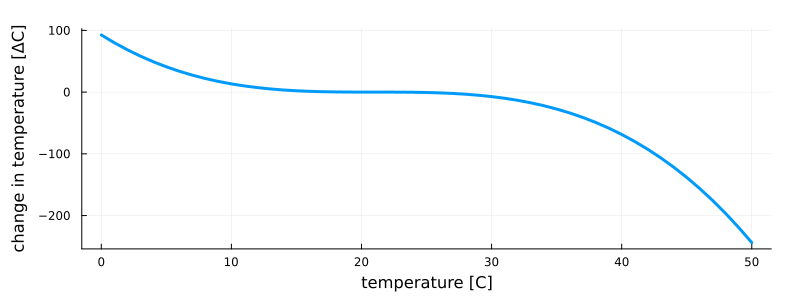

In [556]:
# Simulate nonlinear convection function
dτr = pred_mean.(τr)

plot(xlabel="temperature [C]", ylabel="change in temperature [ΔC]", size=(800,300))
plot!(τr, dτr)

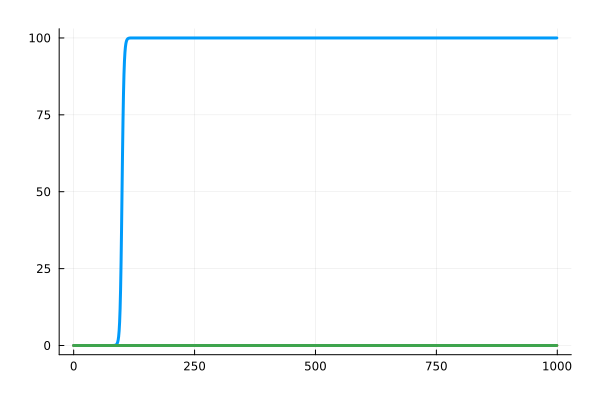

In [557]:
t_onset = 100.
t_offset = 300.
β = 0.5

# Generate functions
u1(t) = u.(t, true_b[1], t_onset, i=1, β=β)
u2(t) = u.(t, true_b[2], t_onset, i=2, β=β)
u3(t) = u.(t, true_b[3], t_onset, i=3, β=β)
  
inputs = hcat([[u1(k); u2(k); u3(k)] for k in tsteps]...)

plot(tsteps, inputs')

In [558]:
function NONLCONV(dz, z, params, t)
    "Lumped-element model with nonlinear convection term"

    # Extract parameters
    mcp_1, mcp_2, mcp_3, a_1, a_2, a_3, k12, k23, h_a = params
    
    # Conduction
    dz[1] = (-k12*z[1] +      k12 *z[2]            ) / mcp_1
    dz[2] = ( k12*z[1] - (k12+k23)*z[2] + k23 *z[3]) / mcp_2
    dz[3] = (                 k23 *z[2] - k23 *z[3]) / mcp_3
    
    # Convection - linear
    dz[1] += h_a * a_1 * (T_a(t) - z[1]) / mcp_1
    dz[2] += h_a * a_2 * (T_a(t) - z[2]) / mcp_2
    dz[3] += h_a * a_3 * (T_a(t) - z[3]) / mcp_3 
    
    # Convection - nonlinear
    # dz[1] += r(z[1],T_a(t)) / mcp_1
    # dz[2] += r(z[2],T_a(t)) / mcp_2
    # dz[3] += r(z[3],T_a(t)) / mcp_3
    dz[1] += pred_mean(z[1]) / mcp_1
    dz[2] += pred_mean(z[2]) / mcp_2
    dz[3] += pred_mean(z[3]) / mcp_3
    
    # Input heat
    dz[1] += u1(t) / mcp_1
    dz[2] += u2(t) / mcp_2
    dz[3] += u3(t) / mcp_3
end

NONLCONV (generic function with 1 method)

In [559]:
sysparams = [true_mcp_1, 
             true_mcp_2, 
             true_mcp_3, 
             true_a_1, 
             true_a_2, 
             true_a_3,
             true_k12, 
             true_k23, 
             true_h_a]

τ_0 = [21., 21., 21.]

# Solve the system numerically using DifferentialEquations.jl
sys_NONLCONV = ODEProblem(NONLCONV, τ_0, (tsteps[1], tsteps[end]), sysparams)
states = Array(solve(sys_NONLCONV, RK4(); saveat=tsteps, verbose = true))

3×1000 Matrix{Float64}:
 21.0  21.0  21.0  21.0  21.0  21.0  …  34.7085  34.7093  34.7101  34.7108
 21.0  21.0  21.0  21.0  21.0  21.0     30.1111  30.112   30.1129  30.1139
 21.0  21.0  21.0  21.0  21.0  21.0     28.1883  28.1894  28.1905  28.1916

In [560]:
# Noisy measurements
measurements = zeros(3,T)
for k = 1:T
    measurements[:,k] = states[:,k] + cholesky(true_R).L*randn(3)
end

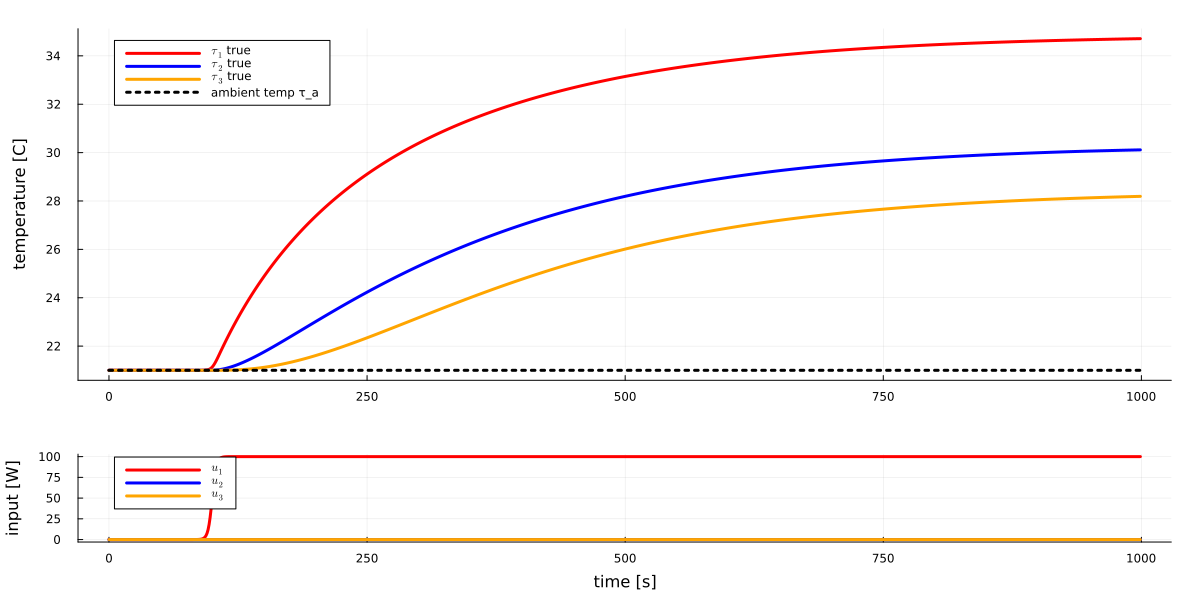

In [561]:
p101 = plot(xlabel="", ylabel="temperature [C]")
plot!(tsteps, states', linecolors = ["red" "blue" "orange"], labels = [L"$τ_1$ true" L"$τ_2$ true" L"$τ_3$ true"], )
# scatter!(tsteps, measurements', markercolors = ["red" "blue" "orange"], labels = [L"$τ_1$ observed" L"$τ_2$ observed" L"$τ_3$ observed"])
plot!(tsteps, T_a.(tsteps), color="black", linewidth=3, linestyle=:dot, label="ambient temp τ_a")

p102 = plot(xlabel = "time [s]", ylabel = "input [W]")
plot!(tsteps, inputs', linecolors = ["red" "blue" "orange"], labels = [L"$u_1$" L"$u_2$" L"$u_3$"], )

plot(p101, p102, layout=grid(2,1, heights=[0.8, 0.2]), size=(1200,600))

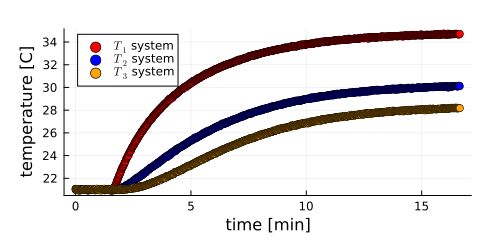

In [562]:
plot(tsteps ./ 60,
     states';
     legend = true, 
     linewidth=4,
    #  title = "GPSSM Simulation MSE = $SMSE_GPSSM",
     linecolors = ["red" "blue" "orange"], 
     fillcolors = ["red" "blue" "orange"], 
#      labels = [L"$T_1$ identified" L"$T_2$ identified" L"$T_3$ identified"],
     xlabel = "time [min]", 
     ylabel = "temperature [C]",
     size=(500,250)
)
scatter!(tsteps ./ 60, 
      transpose(measurements), 
      linewidth=4,
      alpha = 1.,
      markercolors = ["red" "blue" "orange"], 
      linestyle = :dash,
      labels = [L"$T_1$ system" L"$T_2$ system" L"$T_3$ system"],
)


In [563]:
output_ = [measurements[:,k] for k in 1:T];
inputs_ = [[true_τ_a; inputs[:,k]] for k in 1:T];

## GP-augmented state-space model

### Matern-1/2 GP in state-space form
Suppose a function $h(x)$ follows a zero-mean Gaussian Process

$$\begin{aligned}
h(x) \sim \mathcal{GP}(0, k(x,x')) \, .
\end{aligned}$$

The GP can be written as the following differential equation ([Hartikainen, 2013)](https://aaltodoc.aalto.fi/bitstream/handle/123456789/7579/isbn9789526049847.pdf?sequence=1&isAllowed=y)):

$$\begin{align}
\dot{h} = F_h h + L v \, ,
\end{align}$$

with $h$ being states, $F_h$ a state transition matrix and $v$ a white noise process. The Matern GP has a stationary covariance function, defined as:

$$\begin{aligned}
k(\tau) = \sigma^2 \frac{2^{1-\nu}}{\Gamma(\nu)} \left(\frac{\sqrt{2\nu}\tau}{l} \right)^\nu K_\nu\left(\frac{\sqrt{2\nu}\tau}{l} \right)
\end{aligned}$$

where $\sigma^2$ is a scale hyperparameter, $l$ a characteristic length-scale, $\nu$ the smoothness hyperparameter, and $K_\nu(.)$ is a modified Bessel function of the second kind. 

Matern-1/2 refers to $\nu=1/2$. The matrices for the state space model are computed as follows:

$$\begin{aligned}
\mathbf{F}_h = -\lambda,\quad \quad \mathbf{L} = 1, \quad \quad \mathbf{P}_\infty = \sigma^2  ,\quad \quad  Q_c = 2\lambda\sigma^2
\end{aligned}$$ 

where $\lambda = \frac{\sqrt{3}}{l} $.

### Augmented state-space model

The original state-space model (see top) is:

$$\begin{aligned}
\underbrace{\begin{bmatrix} \dot{\tau}_1 \\ \vdots \\ \dot{\tau}_3 \end{bmatrix}}_{\dot{z}} = \underbrace{\begin{bmatrix} \frac{-k_{12} - h_a a_1}{m_1 c_{p,1}} & \frac{k_{12}}{m_1 c_{p,1}} & 0 \\
\frac{k_{12}}{m_2 c_{p,2}} & \frac{-k_{12} - k_{23} - h_a a_2}{m_2 c_{p,2}} & \frac{k_{23}}{m_2 c_{p,2}} \\
 0 & \frac{k_{23}}{m_3 c_{p,3}} & \frac{-k_{23} - h_a a_3}{m_3 c_{p,3}} \end{bmatrix}}_{F} \underbrace{\begin{bmatrix} \tau_1 \\ \vdots \\ \tau_3 \end{bmatrix}}_{z} + \underbrace{\begin{bmatrix} \frac{h_a a_1}{m_1 c_{p,1}} & \frac{1}{m_1 c_{p,1}} & 0 & 0 \\ \frac{h_a a_2}{m_2 c_{p,2}} & 0 & \frac{1}{m_2 c_{p,2}} & 0 \\ \frac{h_a a_3}{m_3 c_{p,3}} & 0 & 0 & \frac{1}{m_3 c_{p,3}} \end{bmatrix}}_{G} \underbrace{\begin{bmatrix} \tau_a \\ u_1 \\ u_2 \\ u_3 \end{bmatrix}}_{u} + M^{-1}r(z) \, 
\end{aligned}$$

Since $r(z)$ is vector-valued, we need multiple GP functions:

$$\begin{aligned}
r(z) \approx h = \begin{bmatrix} h^{(1)} \\ h^{(2)} \\ h^{(3)} \end{bmatrix} \, .
\end{aligned}$$

Augmenting the state-space model with $h$ as described above, gives:

$$\begin{aligned}
\begin{bmatrix} \dot{z} \\ \dot{h} \end{bmatrix} = \begin{bmatrix} F & M^{-1} \\ 0 & F_h \end{bmatrix} \begin{bmatrix} z \\ h \end{bmatrix} +  \begin{bmatrix} G \\ 0 \end{bmatrix} u + \begin{bmatrix} 0 \\ L \end{bmatrix} w \, .
\end{aligned}$$

After discretization, we get:

$$\begin{aligned}
x_{k+1} = A x_k + B u_k + w_k\, , \quad \text{with}\ w_k \sim \mathcal{N}(0, Q) \, ,
\end{aligned}$$

where $x_k = \begin{bmatrix} z_k \\ h_k \end{bmatrix}$ and

$$\begin{aligned}
    A = \exp\big(\Delta t \begin{bmatrix} F & M^{-1} \\ 0 & F_h \end{bmatrix} \big) \, , \quad B = \begin{bmatrix} \Delta t G \\ 0 \end{bmatrix} \, , \quad Q = \int_0^{\Delta t} \exp(\begin{bmatrix} F & M^{-1} \\ 0 & F_h \end{bmatrix}t) \begin{bmatrix} 0 \\ L \end{bmatrix} Q_c \begin{bmatrix} 0 \\ L \end{bmatrix}^{\top} \exp(\begin{bmatrix} F & M^{-1} \\ 0 & F_h \end{bmatrix} t)^{\top} dt \, .
\end{aligned}$$

In [564]:
@model function SSM(A, B, C, Q, R, m0, S0; T=1)
    
    x = randomvar(T)
    u = datavar(Vector{Float64}, T)
    y = datavar(Vector{Float64}, T)
    
    x_0 ~ MvNormalMeanCovariance(m0, S0)
    x_kmin1 = x_0
    for k = 1:T
        
        x[k] ~ MvNormalMeanCovariance(A*x_kmin1 + B*u[k], Q)
        y[k] ~ MvNormalMeanCovariance(C*x[k], R)
        
        x_kmin1 = x[k]
    end
end

In [681]:
Dx = 6
Dt = 3
Dh = 3
Du = 4
Dy = 3

M  = [true_mcp_1          0           0;
     0           true_mcp_2           0;
     0                    0  true_mcp_3]
K  = [-true_k12       true_k12                0;
       true_k12  -(true_k12+true_k23)  true_k23;
              0       true_k23        -true_k23]
An = [true_a_1, true_a_2, true_a_3]

F  = inv(M)*(K - true_h_a*diagm(An))
G  = inv(M)*[true_h_a*An diagm(ones(Dh))]

λ_star = λ_true
γ_star = γ_true

A  = exp([F                              inv(M);
          zeros(Dh,Dh)  diagm(-λ_star*ones(Dh))]*Δt)
B  = [G; zeros(Dh,Du)]*Δt
C  = [diagm(ones(Dy)) zeros(Dy,Dx-Dy)]
Q  = analyticQ(inv(M), λ_star, γ_star, Δt=Δt)
R  = true_R*diagm(ones(Dy))

m0 = [τ_0; zeros(Dh)]
S0 = diagm([ones(Dy); γ_star^2*ones(Dh)])

α_l = 2.0
β_l = 0.02
α_γ = 2.0
β_γ = 0.02

m_l = 6.
s_l = 1.
m_γ = 6.
s_γ = 1.

results = inference(
    model       = SSM(A, B, C, Q, R, m0, S0, T=T),
    data        = (y = output_, u = inputs_),
    options     = (limit_stack_depth = 100,),
    free_energy = true,
)

Inference results:
  Posteriors       | available for (x_0, x)
  Free Energy:     | Real[-1536.16]


In [674]:
# [mode(GammaShapeRate(α_l, β_l)) var(GammaShapeRate(α_l, β_l))]

1×2 Matrix{Float64}:
 50.0  5000.0

In [677]:
m_l = 6.
s_l = 1.
m_γ = 6.
s_γ = 1.
[mode(LogNormal(m_l, s_l)) var(LogNormal(m_l, s_l))]

1×2 Matrix{Float64}:
 148.413  7.60191e5

In [682]:
function J(hparams::AbstractVector)

    "Prior distribution"

    # prior_l = GammaShapeRate(α_l, β_l)
    # prior_γ = GammaShapeRate(α_γ, β_γ)
    prior_l = LogNormal(m_l, s_l)
    prior_γ = LogNormal(m_γ, s_γ)

    "Likelihood"

    λ = sqrt(3)/hparams[1]
    A = [inv(M)*(K-true_h_a*diagm(An))              inv(M);
         zeros(Dh,Dh)                   -λ*diagm(ones(Dh))]*Δt + diagm(ones(Dx))
        
    Q = analyticQ(inv(M), λ, hparams[2], Δt=Δt)
        
    m0 = [τ_0; zeros(3)]
    S0 = diagm([ones(3); hparams[2]^2*ones(3)])

    results = inference(
        model       = SSM(A, B, C, Q, R, m0, S0, T=T),
        data        = (y = output_, u = inputs_),
        options     = (limit_stack_depth = 100,),
        free_energy = true,
    )

    # Total cost
    # return results.free_energy[end] + prior1 + prior2

    qx = results.posteriors[:x]
    fitx_v = cat( var.(qx)..., dims=2)
    fitx_m = cat(mean.(qx)..., dims=2)

    return sum( 1 ./fitx_v[1:3,:] .*(fitx_m[1:3,:] - measurements).^2) -Distributions.logpdf(prior_l, hparams[1]) -Distributions.logpdf(prior_γ, hparams[2])

end

ops = Optim.Options(g_tol=1e-8, time_limit=300, show_every=1)
res = optimize(J, 1e1, 1e2, [60., 60.], Fminbox(LBFGS()), ops; autodiff=:forward)
# res = optimize(J, [1., 1.], LBFGS(), ops; autodiff=:forward)
l_star, γ_star = Optim.minimizer(res)

2-element Vector{Float64}:
 59.69724066913319
 99.9999999998326

In [654]:
hparams = [50., 50.]
t1 = sum( 1 ./fitx_v[1:3,:] .*(fitx_m[1:3,:] - measurements).^2) 
t2 = -Distributions.logpdf(prior_l, hparams[1]) 
t3 = -Distributions.logpdf(prior_γ, hparams[2])

[t1 t2 t3]

1×3 Matrix{Float64}:
 390.257  5.42281  5.42281

In [655]:
[l_true l_star]

1×2 Matrix{Float64}:
 67.2821  12.3339

In [656]:
[γ_true γ_star]

1×2 Matrix{Float64}:
 54.5981  53.2626

In [657]:
λ_star = sqrt(3)/l_star
A = exp([inv(M)*(K-true_h_a*diagm(An))                  inv(M);
         zeros(Dh,Dh)                  -λ_star*diagm(ones(Dh))]*Δt)
Q = analyticQ(inv(M),λ_star, γ_star, Δt=Δt)

m0 = [τ_0; zeros(Dh)]
S0 = diagm([ones(Dt); γ_star^2*ones(Dh)])

results = inference(
        model       = SSM(A, B, C, Q, R, m0, S0, T=T),
        data        = (y = output_, u = inputs_),
        options     = (limit_stack_depth = 100,),
        free_energy = true,
    )

Inference results:
  Posteriors       | available for (x_0, x)
  Free Energy:     | Real[806.309]


In [658]:
H = ForwardDiff.jacobian(x -> ForwardDiff.gradient(J, x), [l_star, γ_star])
post_S = inv(Hermitian((H + H')/2))
post_hparams = MvNormal([l_star, γ_star], post_S)

FullNormal(
dim: 2
μ: [12.333883653385282, 53.26263811920285]
Σ: [126.93523472852773 217.59634188060178; 217.59634188060178 957.7899554909312]
)


In [692]:
mode(prior_l)

54.598150033144236

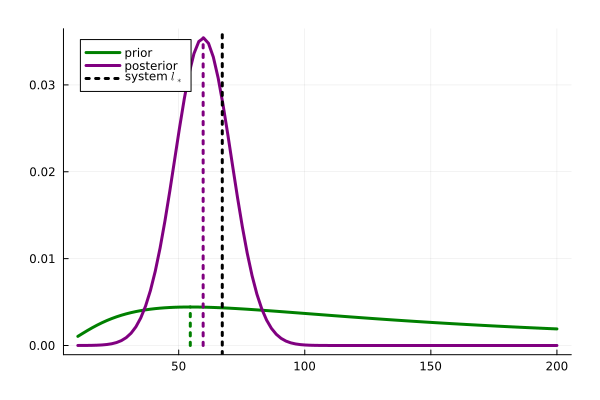

In [690]:
lr = range(10., stop=200., length=100)
post_l = NormalMeanVariance(l_star, post_S[1,1])

plot(legend=:topleft)
plot!(lr, pdf.(prior_l, lr), color="green", label="prior")
plot!([mode(prior_l), mode(prior_l)], [0.0, pdf(prior_l, mode(prior_l))], linestyle=:dot, color="green")
plot!(lr, pdf.(post_l, lr), color="purple", label="posterior")
plot!([mode(post_l), mode(post_l)], [0.0, pdf(post_l, mode(post_l))], linestyle=:dot, color="purple")
vline!([l_true], color="black", linestyle=:dot, label=L"system $l_*$", )

In [689]:
mode(prior_γ)

54.598150033144236

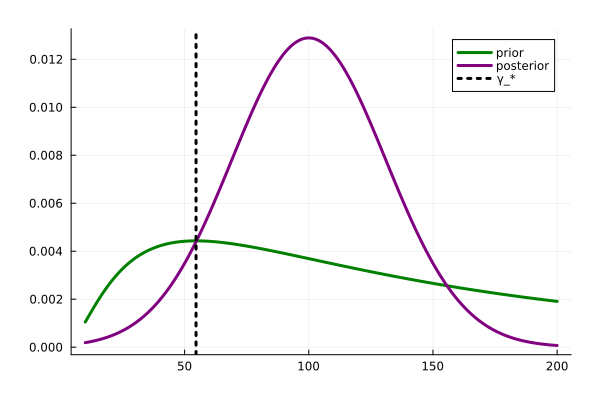

In [688]:
γr = range(1e1, stop=2e2, length=300)
post_γ = NormalMeanVariance(γ_star, post_S[2,2])

plot(γr, pdf.(prior_γ, γr), color="green", label="prior")
plot!(γr, pdf.(post_γ, γr), color="purple", label="posterior")
vline!([γ_true], color="black", linestyle=:dot, label="γ_*")

In [231]:
qx = results.posteriors[:x]
fitx_v = cat( var.(qx)..., dims=2)
fitx_m = cat(mean.(qx)..., dims=2)

6×1000 Matrix{Float64}:
 21.0179     21.0176     21.0164     …   34.7161    34.7183    34.7211
 21.0048     21.0047     21.0041         30.1296    30.1321    30.1338
 21.0013     21.0015     21.0015         28.194     28.1959    28.1978
 -0.547078   -0.549091   -0.550877      -25.1395   -25.0722   -25.0058
 -0.268282   -0.269073   -0.269279       -6.22963   -6.2115    -6.19503
 -0.0516435  -0.0520191  -0.0526648  …   -3.54643   -3.53542   -3.52565

In [232]:
SMSE_GPSSM = mean((fitx_m[1:3,:] - states).^2)
println("MSE states and fit: $SMSE_GPSSM")

MSE states and fit: 4.148884989448573e-5


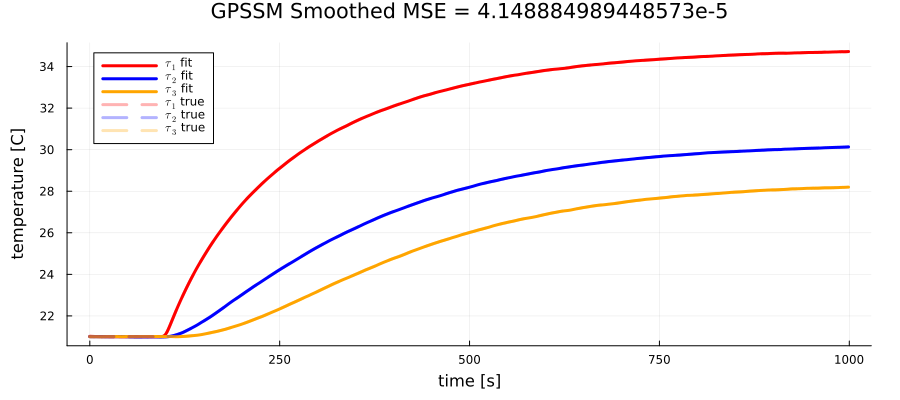

In [233]:
plot(tsteps,
     fitx_m[1:3,:]';
     ribbon=sqrt.(fitx_v[1:3,:])',
     legend = true, 
     title="GPSSM Smoothed MSE = $SMSE_GPSSM",
     linecolors = ["red" "blue" "orange"], 
     fillcolors = ["red" "blue" "orange"], 
     labels = [L"$τ_1$ fit" L"$τ_2$ fit" L"$τ_3$ fit"],
     xlabel = "time [s]", 
     ylabel = "temperature [C]",
     size=(900,400)
)
plot!(tsteps, 
      transpose(states), 
      alpha = 0.3,
      linecolors = ["red" "blue" "orange"], 
      linestyle = :dash,
      labels = [L"$τ_1$ true" L"$τ_2$ true" L"$τ_3$ true"],
)


### Gaussian process fits over time

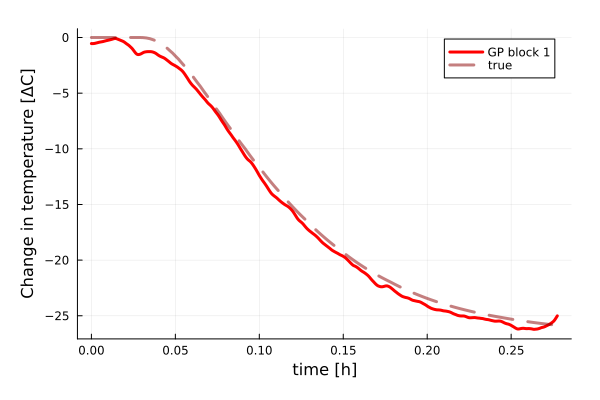

In [234]:
plot(tsteps ./ 3600,
     fitx_m[4,:];
     ribbon=sqrt.(fitx_v[4,:])./10,
     legend = true, 
     color = "red",
     labels = "GP block 1",
     xlabel = "time [h]", 
     ylabel = "Change in temperature [ΔC]",
     size=(600,400)
)
plot!(tsteps ./ 3600, pred_mean_block1.(states[1,:]), color="darkred", alpha=0.5, linestyle=:dash, label="true")
# plot!(tsteps, r.(states[1,:],1,true_τ_a), color="darkred", alpha=0.5, linestyle=:dash, label="true")

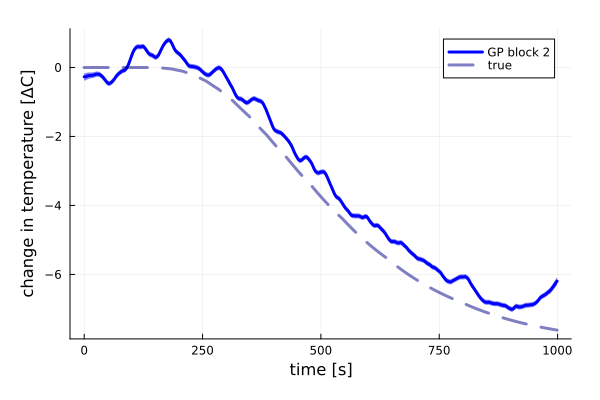

In [235]:
plot(tsteps,
     fitx_m[5,:],
     ribbon=sqrt.(fitx_v[5,:])./10,
     legend = true, 
     color = "blue",
     labels = "GP block 2",
     xlabel = "time [s]", 
     ylabel = "change in temperature [ΔC]",
     size=(600,400)
)
plot!(tsteps, pred_mean_block2.(states[2,:]), color="darkblue", alpha=0.5, linestyle=:dash, label="true")

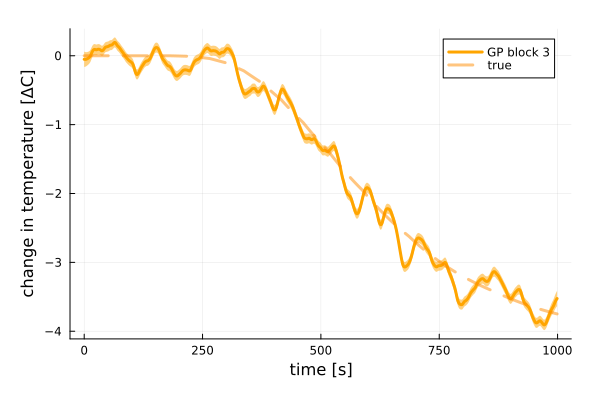

In [236]:
plot(tsteps,
     fitx_m[6,:],
     ribbon=sqrt.(fitx_v[6,:]) ./ 10,
     legend = true, 
     color = "orange",
     labels = "GP block 3",
     xlabel = "time [s]", 
     ylabel = "change in temperature [ΔC]",
     size=(600,400)
)
plot!(tsteps, pred_mean_block3.(states[3,:]), color="darkorange", alpha=0.5, linestyle=:dash, label="true")

### Extract nonlinearity

In [61]:
n_samples = 5
deg = 3

yls = [-0.5, 0.05]
xls = [285, 296]

samples_z1 = cat([rand(Normal(fitx_m[1,k],sqrt.(fitx_v[1,k])), n_samples) for k in 1:T]...,dims=2)
samples_z2 = cat([rand(Normal(fitx_m[2,k],sqrt.(fitx_v[2,k])), n_samples) for k in 1:T]...,dims=2)
samples_z3 = cat([rand(Normal(fitx_m[3,k],sqrt.(fitx_v[3,k])), n_samples) for k in 1:T]...,dims=2)
samples_f1 = cat([rand(Normal(fitx_m[4,k],sqrt.(fitx_v[4,k])), n_samples) for k in 1:T]...,dims=2)
samples_f2 = cat([rand(Normal(fitx_m[5,k],sqrt.(fitx_v[5,k])), n_samples) for k in 1:T]...,dims=2)
samples_f3 = cat([rand(Normal(fitx_m[6,k],sqrt.(fitx_v[6,k])), n_samples) for k in 1:T]...,dims=2)

5×1000 Matrix{Float64}:
   4.60343   -8.68108    5.31785   …   8.93212   -7.87148   1.11855
  -4.70697   10.0557    21.1117        9.48868  -13.4863   -8.54584
   7.4666   -13.9916   -18.5929        8.0952   -18.8661   -7.78153
 -10.1282     7.96861    0.306668     -1.66109   13.0086   -3.48377
   1.33564  -13.7791     7.69595       6.74234   -2.43075  -3.04294

In [62]:
f1_pol3 = Polynomials.fit(Polynomial{Float64}, fitx_m[1,:], fitx_m[4,:], deg, weights=fitx_v[4,:])

Polynomial(130.39683516170393 - 17.260040524489725*x + 0.7678715798652637*x^2 - 0.01154427966422441*x^3)

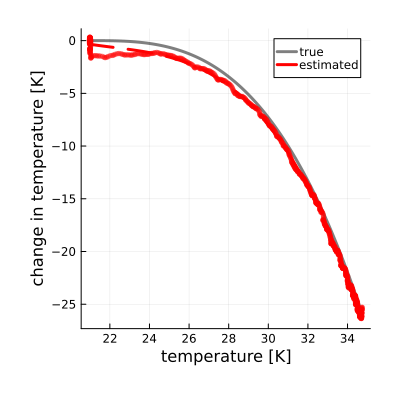

In [63]:
plot(xlabel="temperature [K]",
     ylabel="change in temperature [K]",
     # yticks=(range(-1000,stop=0.0, length=5), round.(range(-1000,stop=0.0, length=5).*Δt./true_mcp_1, digits=2)),
     # ylims=(-1000,0)
     size=(400,400),
     )
plot!(states[1,:], r.(states[1,:],1,true_τ_a), color="black", alpha=0.5, label="true")
# scatter!(fitx_m[1,:], samples_f1', alpha=0.05, markerstrokewidth=0, markersize=3, color="red")
scatter!(fitx_m[1,:], fitx_m[4,:], alpha=0.5, markerstrokewidth=0, markersize=3, color="red")
plot!(sort(fitx_m[1,:]), x -> f1_pol3(x), color="red", linestyle=:dash, label="estimated")

In [64]:
f2_pol3 = Polynomials.fit(fitx_m[2,:], fitx_m[5,:], deg, weights=fitx_v[5,:])

Polynomial(21.94379068851428 - 5.101957061334464*x + 0.32196082264724984*x^2 - 0.006127887765990866*x^3)

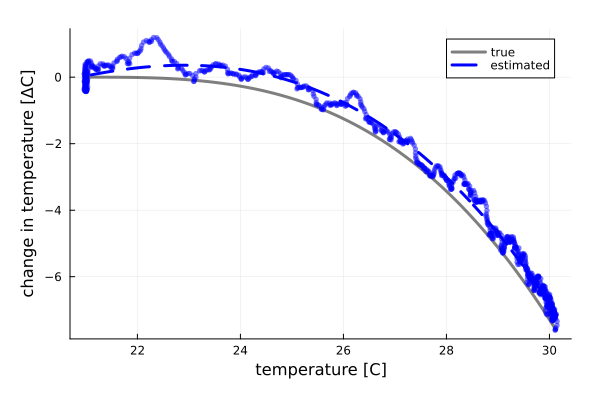

In [65]:
plot(xlabel="temperature [C]",
     ylabel="change in temperature [ΔC]",
     # yticks=(range(-250,stop=50., length=4), round.(range(-250,stop=50., length=4).*Δt./true_mcp_2, digits=2)),
     # ylims=(-250,50),
     )
plot!(states[2,:], r.(states[2,:],2,true_τ_a), color="black", alpha=0.5, label="true")
# scatter!(fitx_m[2,:], samples_f2', alpha=0.05, markerstrokewidth=0, markersize=3, color="blue")
scatter!(fitx_m[2,:], fitx_m[5,:], alpha=0.5, markerstrokewidth=0, markersize=3, color="blue")
plot!(fitx_m[2,:], x -> f2_pol3(x), color="blue", linestyle=:dash, label="estimated")

In [66]:
f3_pol3 = Polynomials.fit(fitx_m[3,:], fitx_m[6,:], deg, weights=fitx_v[6,:])

Polynomial(127.9519202196578 - 17.36893298793429*x + 0.7911630226160564*x^2 - 0.012087960707995374*x^3)

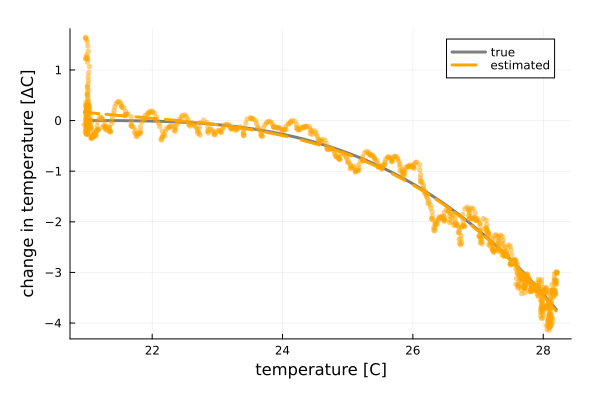

In [67]:
plot(xlabel="temperature [C]",
     ylabel="change in temperature [ΔC]",
     # yticks=(range(-60,stop=0., length=4), round.(range(-60,stop=0, length=4).*Δt./true_mcp_3, digits=2)),
     # ylims=(-60, 0.),
     )
plot!(states[3,:], r.(states[3,:],3,true_τ_a), color="black", alpha=0.5, label="true")
# scatter!(fitx_m[3,:], samples_f3', alpha=0.05, markerstrokewidth=0, markersize=3, color="orange")
scatter!(fitx_m[3,:], fitx_m[6,:], alpha=0.5, markerstrokewidth=0, markersize=3, color="orange")
plot!(fitx_m[3,:], x -> f3_pol3(x), color="orange", linestyle=:dash, label="estimated")

## Model validation

### Simulation with true function to generate validation data

In [68]:
N_val = 1000
tsteps_val = range(0.0, step=Δt, length=N_val)

t_onset_val = 120.
t_offset_val = 600.
β = 0.5

# Generate functions
# u1(t) = u.(t, b=true_b[1], t_on=t_onset, t_off=t_offset, i=1, β1=β)
u1_val(t) = u.(t, b=true_b[1], t_on=t_onset_val, t_off=t_offset_val, i=1, β1=β)
u2_val(t) = u.(t, b=true_b[2], t_on=t_onset_val, t_off=t_offset_val, i=2, β1=β)
u3_val(t) = u.(t, b=true_b[3], t_on=t_onset_val, t_off=t_offset_val, i=3, β1=β)

inputs_val = hcat([[u1_val(k); u2_val(k); u3_val(k)] for k in tsteps_val]...)

3×1000 Matrix{Float64}:
 8.75651e-25  1.4437e-24  2.38027e-24  3.9244e-24  …  7.24967e-68  4.8596e-68
 0.0          0.0         0.0          0.0            0.0          0.0
 0.0          0.0         0.0          0.0            0.0          0.0

In [69]:
function NONLCONV_val(dz, z, params, t)
    "Lumped-element model with nonlinear convection term"

    # Extract parameters
    mcp_1, mcp_2, mcp_3, a_1, a_2, a_3, τ_a, k12, k23, h_a = params
    
    # Conduction
    dz[1] = (-k12*z[1] +      k12 *z[2]            ) / mcp_1
    dz[2] = ( k12*z[1] - (k12+k23)*z[2] + k23 *z[3]) / mcp_2
    dz[3] = (                 k23 *z[2] - k23 *z[3]) / mcp_3
    
    # Convection - linear
    dz[1] += h_a * a_1 * (τ_a - z[1]) / mcp_1
    dz[2] += h_a * a_2 * (τ_a - z[2]) / mcp_2
    dz[3] += h_a * a_3 * (τ_a - z[3]) / mcp_3
    
    # Convection - nonlinear
    dz[1] += pred_mean_block1(z[1]) ./ mcp_1
    dz[2] += pred_mean_block2(z[2]) ./ mcp_2
    dz[3] += pred_mean_block3(z[3]) ./ mcp_3
    
    # Input heat
    dz[1] += u1_val(t) / mcp_1
    dz[2] += u2_val(t) / mcp_2
    dz[3] += u3_val(t) / mcp_3
end

NONLCONV_val (generic function with 1 method)

In [70]:
sysparams = [true_mcp_1, 
             true_mcp_2, 
             true_mcp_3, 
             true_a_1, 
             true_a_2, 
             true_a_3, 
             true_τ_a, 
             true_k12, 
             true_k23, 
             true_h_a]

τ0_val = [25., 25., 25.]
sys_NONLCONV = ODEProblem(NONLCONV_val, τ0_val, (tsteps_val[1], tsteps_val[end]), sysparams)
states_val = Array(solve(sys_NONLCONV, RK4(); saveat=tsteps_val, verbose = true))

measurements_val = states_val + cholesky(true_R).L*randn(size(states_val))

3×1000 Matrix{Float64}:
 25.01    24.9967  24.9742  24.9958  …  24.647   24.6296  24.6333  24.6282
 25.0254  25.0224  24.9484  24.96       24.6635  24.6115  24.6558  24.6171
 24.9796  24.9855  24.9671  24.9793     24.5915  24.5882  24.5777  24.6127

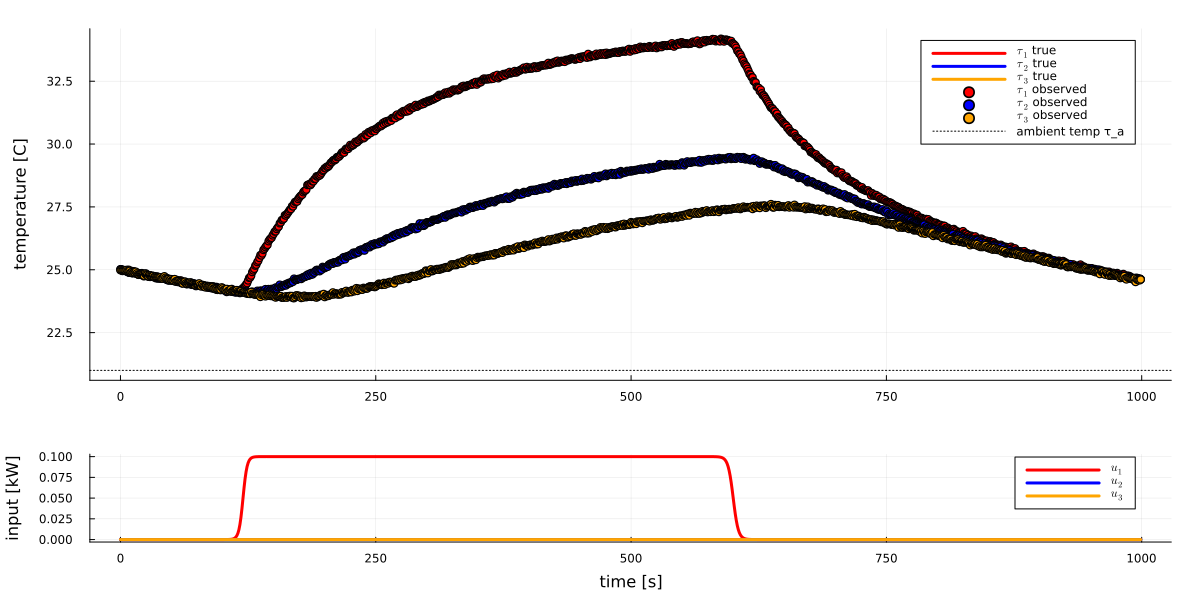

In [71]:
p101 = plot(xlabel="", ylabel="temperature [C]")
plot!(tsteps_val, states_val', linecolors = ["red" "blue" "orange"], labels = [L"$τ_1$ true" L"$τ_2$ true" L"$τ_3$ true"], )
scatter!(tsteps_val, measurements_val', markercolors = ["red" "blue" "orange"], labels = [L"$τ_1$ observed" L"$τ_2$ observed" L"$τ_3$ observed"])
hline!([true_τ_a], color="black", linewidth=1, linestyle=:dot, label="ambient temp τ_a")

p102 = plot(xlabel = "time [s]", ylabel = "input [kW]")
plot!(tsteps_val, inputs_val' ./ 1000, linecolors = ["red" "blue" "orange"], labels = [L"$u_1$" L"$u_2$" L"$u_3$"], )

plot(p101, p102, layout=grid(2,1, heights=[0.8, 0.2]), size=(1200,600))

### Simulation by identified model

In [72]:
function NONLCONV_idsim(dz, z, params, t)
    "Lumped-element model with nonlinear convection term"

    # Extract parameters
    mcp_1, mcp_2, mcp_3, a_1, a_2, a_3, τ_a, k12, k23, h_a = params
    
    # Conduction
    dz[1] = (-k12*z[1] +      k12 *z[2]            ) / mcp_1
    dz[2] = ( k12*z[1] - (k12+k23)*z[2] + k23 *z[3]) / mcp_2
    dz[3] = (                 k23 *z[2] - k23 *z[3]) / mcp_3
    
    # Convection - linear
    dz[1] += h_a * a_1 * (τ_a - z[1]) / mcp_1
    dz[2] += h_a * a_2 * (τ_a - z[2]) / mcp_2
    dz[3] += h_a * a_3 * (τ_a - z[3]) / mcp_3
    
    # Convection - nonlinear
    dz[1] += f1_pol3(z[1]) ./ mcp_1
    dz[2] += f2_pol3(z[2]) ./ mcp_2
    dz[3] += f3_pol3(z[3]) ./ mcp_3
    
    # Input heat
    dz[1] += u1_val(t) / mcp_1
    dz[2] += u2_val(t) / mcp_2
    dz[3] += u3_val(t) / mcp_3
end

idNONLCONV = ODEProblem(NONLCONV_idsim, τ0_val, (tsteps_val[1], tsteps_val[end]), sysparams)
sim_states = Array(solve(idNONLCONV, Tsit5(); saveat=tsteps_val, verbose = true))

3×1000 Matrix{Float64}:
 25.0  24.9905  24.9809  24.9715  …  24.5587  24.5507  24.5427  24.5348
 25.0  24.9919  24.9837  24.9756     24.6056  24.5978  24.5901  24.5823
 25.0  24.9913  24.9827  24.9741     24.5919  24.5844  24.5769  24.5694

### Compare true and identified 

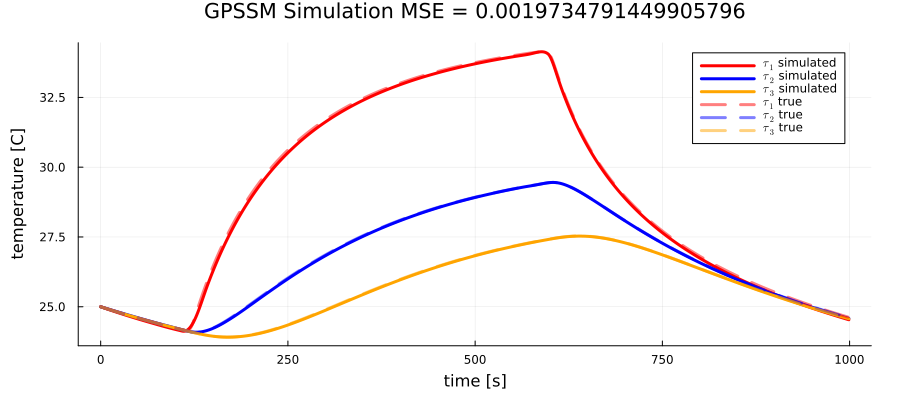

In [73]:
SMSE_GPSSM = mean((sim_states - states_val).^2)

plot(tsteps_val,
     sim_states';
     legend = true, 
     title = "GPSSM Simulation MSE = $SMSE_GPSSM",
     linecolors = ["red" "blue" "orange"], 
     fillcolors = ["red" "blue" "orange"], 
     labels = [L"$τ_1$ simulated" L"$τ_2$ simulated" L"$τ_3$ simulated"],
     xlabel = "time [s]", 
     ylabel = "temperature [C]",
     size=(900,400)
)
plot!(tsteps_val, 
      transpose(states_val), 
      alpha = 0.5,
      linecolors = ["red" "blue" "orange"], 
      linestyle = :dash,
      labels = [L"$τ_1$ true" L"$τ_2$ true" L"$τ_3$ true"],
)


In [416]:
jldsave("results/LGPASSM.jld2"; true_mcp_1, true_mcp_2, true_mcp_3, true_τ_a, tsteps, Δt, fitx_m, fitx_v, states, measurements, inputs, f1_pol3, f2_pol3, f3_pol3, l_star, γ_star, tsteps_val, sim_states, states_val)